In [1]:
import os
from pathlib import Path
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np

import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold

from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor




#### Exercise ####


#### Please refer to module 1 of MultipleRegression - MultipleLinear for Task 1-8
#### Task 1
##### Import the required packages.
##### Set the working directory to data directory.
##### Print the working directory.
#### Result:


In [2]:
working_dir = Path(os.getcwd())
home_dir = working_dir
data_dir = str(home_dir) +'/data/'
list_files = os.listdir(data_dir)
print(list_files)
    

['insurance.csv', '.ipynb_checkpoints', 'ChemicalManufacturingProcess.csv']


#### Task 2
##### Read in the `insurance.csv` file and name it as `ex_data`.
#### Result:


In [3]:
file_name = 'insurance.csv'
try:
    ex_data = pd.read_csv(data_dir + file_name)
except:
    print('no file or wrong directory')
    

#### Task 3
##### Create a subset of `charges` and ['age', 'bmi'] from ex_data and save as `ex_regression`.
##### Print the head of `ex_regression`.
##### Print the summary statistics of `ex_regression`.
#### Result:


In [4]:
ex_data.head()
columns = ['age','bmi','charges']

In [5]:
ex_regression = ex_data[columns]

#### Task 4
##### Print the covariance of `ex_regression`.
##### Print the correlation matrix of `ex_regression`. Save it to `ex_cor`.
##### Create a correlation plot of `ex_regression` and print it.
#### Result:


In [6]:
print('covariance matrix:')
ex_regression.cov()

covariance matrix:


,age,bmi,charges
age,197.243282,9.368233,5.073683e+04
bmi,9.368233,37.215715,1.465763e+04
charges,50736.833698,14657.628526,1.466608e+08


correlation matrix:


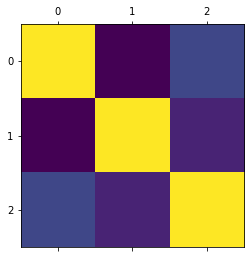

,age,bmi,charges
age,1.000000,0.109344,0.298308
bmi,0.109344,1.000000,0.198401
charges,0.298308,0.198401,1.000000


In [7]:
print('correlation matrix:')
ex_corr = ex_regression.corr()
plt.matshow(ex_corr)
plt.show()

ex_corr.style.background_gradient()


#### Task 5
##### Check the number of NAs in each column.
##### Substitute the NAs with the mean value in each of the respective columns.
##### Check each column again to confirm that there are no null values.
#### Result:


In [8]:
for x in ex_regression:
    ex_regression[x].fillna(ex_regression[x].mean())

#### Task 6
##### Create a scatter plot matrix of the variables in `ex_regression`.


#### Result:


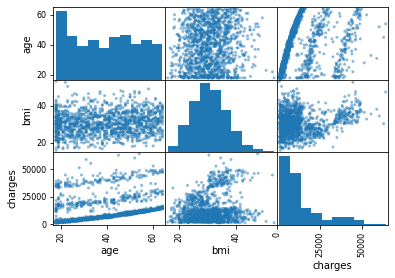

In [9]:
scatter_matrix(ex_regression)

plt.show()

#### Task 7
##### Check the variables for zero variance using the `VarianceThreshold` function.
##### Instantiate the function and save it to `selector`.
##### Save the cleaned dataset to `ex_regression_clean`.
##### Print the shape of the new dataset.
##### What is the number of columns in the new dataset? 
#### Result:


In [10]:
selector = VarianceThreshold()

In [11]:
ex_regression_clean = selector.fit_transform(ex_regression)

In [12]:
ex_regression.shape

(1337, 3)

In [13]:
ex_regression_clean.shape

(1337, 3)

In [14]:
if (ex_regression.shape[1] == ex_regression_clean.shape[1]):
    print('Column count has not changed')
else:
    print('Column count has changed')

Column count has not changed


#### Task 8
##### Split our dataset `ex_regression` for modeling into `ex_X` and `ex_y` variables.
##### Save the predictors into `ex_X`. Add a constant to `ex_X`.
##### Save the target variable `charges` into `ex_y`.
#### Result:


In [15]:
predictors = ['age','bmi']
target = 'charges'
ex_regression_clean = pd.DataFrame(ex_regression_clean, columns = columns)


ex_x = ex_regression_clean[predictors]
ex_x = sm.add_constant(ex_x)
ex_y = ex_regression_clean[target]

#### Please refer to module 2 of MultipleRegression - MultipleLinear for Task 9-14
#### Task 9
##### Set the random seed to `1`.
##### Split 70% of `ex_regression` dataset to the train set and the remaining 30% to the test set. 
##### Split the sets into `ex_X` and `ex_y` as `ex_X_train`, `ex_X_test`, `ex_y_train` and `ex_y_test` respectively.
##### Check the shape of the train set and test set to see if they've split correctly.
#### Result:


In [16]:
np.random.seed(1)
ex_x_train, ex_x_test, ex_y_train, ex_y_test = train_test_split(ex_x, ex_y, test_size = 0.3)
print(ex_x_train.shape)
print(ex_y_train.shape)


print(ex_x_test.shape)
print(ex_y_test.shape)


(935, 3)
(935,)
(402, 3)
(402,)


#### Task 10
##### Use `sm.OLS()` function to run multiple linear regression on our training data, `ex_y_train` and `ex_X_train`. 
##### Save the model to `ex_model_m` and view its summary.
#### Result:


In [17]:
ex_model_m = sm.OLS(ex_y_train,ex_x_train).fit()
print(ex_model_m.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     63.01
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           2.16e-26
Time:                        02:07:10   Log-Likelihood:                -10060.
No. Observations:                 935   AIC:                         2.013e+04
Df Residuals:                     932   BIC:                         2.014e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7019.2682   2091.280     -3.356      0.0

#### Task 11
##### Save the fitted values into `ex_fitted_m` and the residuals into `ex_residuals_m` from our model `ex_model`.
##### Save the normalized results to ` ex_model_m_norm_residuals` and the absolute squared residuals to ` ex_model_m_norm_residuals_abs_sqrt`.
##### Derive the absolute residuals to `ex_model_m_abs_resid`.
##### Combine `ex_X_train` and `ex_y_train` into one DataFrame named `ex_frames` for plotting.
##### Concatenate by columns and save to `ex_training`.
#### Result:


In [18]:
ex_fitted_m = ex_model_m.fittedvalues
ex_residuals_m = ex_model_m.resid

ex_model_m_norm_residuals = ex_model_m.get_influence().resid_studentized_internal

#print(ex_model_m_norm_residuals)
ex_model_m_norm_residuals_abs_sqrt = np.sqrt(np.abs(ex_model_m_norm_residuals))
#print(ex_model_m_norm_residuals_abs_sqrt)

model_m_abs_resid = np.abs(ex_residuals_m)

ex_trining = pd.concat([ex_x_train,ex_y_train], axis = 1)


#### Task 12
##### Test the assumption that the relationship between the predictor and target variable is linear.
##### Does our model satisfy this assumption?
#### Result:


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='charges'>

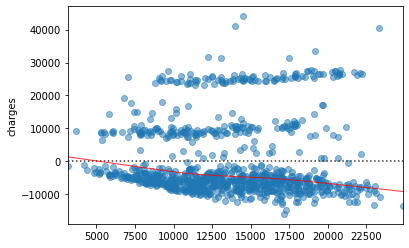

In [19]:
import seaborn as sns
sns.residplot(ex_fitted_m, "charges", data = ex_trining, 
                          lowess = True, 
                          scatter_kws = {'alpha': 0.5}, 
                          line_kws = {'color': 'red', 'lw': 1, 'alpha': 0.8})

We want all points to be scattered about the solid red line, which is not the case. Also there are three groups

#### Task 13
##### Test the assumption that the residuals are normally distributed.
##### Does our model satisfy the assumption?
#### Result:


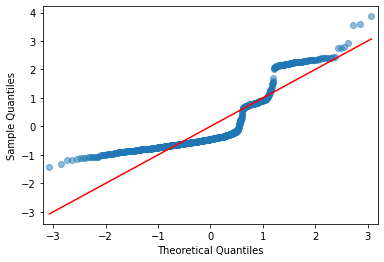

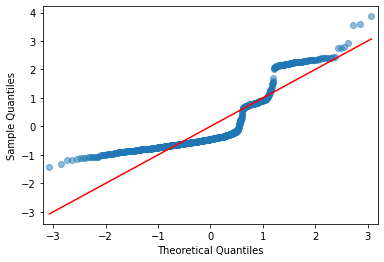

In [20]:
from statsmodels.graphics.gofplots import ProbPlot

QQ = ProbPlot(ex_model_m_norm_residuals)
QQ.qqplot(line = 's', alpha = 0.5, color = '#4C72B0', lw = 1)


#### Task 14
##### Test the assumption that the residuals have equal variance.
##### Does our model satisfy the assumption?
#### Result:


No, the residuals should conform to the line, which is not the case

#### Please refer to module 3 of MultipleRegression - MultipleLinear for Task 15-22
#### Task 15
##### Test the model `ex_model_m` for outliers using the `statsmodel.outlier_test()` function.
##### Save it to `ex_test_m`.
#### Result:


In [21]:
ex_test_m = ex_model_m.outlier_test()
print(ex_test_m)

filtered_out_outliers_ex_test_m_index = ex_test_m[ex_test_m['bonf(p)']<0.05].index
#ex_test_m_drop = ex_test_m.drop(filtered_out_outliers_ex_test_m)

print(ex_test_m.shape)
print(filtered_out_outliers_ex_test_m_index)

      student_resid   unadj_p  bonf(p)
520       -1.147993  0.251266      1.0
575       -0.571593  0.567736      1.0
769        0.639530  0.522636      1.0
314       -0.683024  0.494761      1.0
426       -0.071192  0.943260      1.0
...             ...       ...      ...
715       -0.283985  0.776485      1.0
905       -0.583479  0.559712      1.0
1096      -0.800488  0.423632      1.0
235       -0.491589  0.623126      1.0
1061       2.368045  0.018086      1.0

[935 rows x 3 columns]
(935, 3)
Int64Index([], dtype='int64')


#### Task 16
##### Remove the outliers from our original train set `ex_X_train` and `ex_y_train`. Save them as `ex_X_train_no_outliers` and `ex_y_train_no_outliers`.
##### Print the shape of the new DataFrame. Is there any change in the DataFrame?
#### Result:


In [22]:
# This was done above, there are no columns dropped

ex_x_train_no_outliers = ex_x_train.drop(filtered_out_outliers_ex_test_m_index)
ex_y_train_no_outliers = ex_y_train.drop(filtered_out_outliers_ex_test_m_index)

#### Task 17
##### Rerun the multiple linear regression on our new DataFrames, `ex_y_train_no_outliers` and `ex_X_train_no_outliers`.
##### Save it as `ex_model_m_no_outliers` and print its summary.
#### Result:


In [23]:
y = ex_y_train_no_outliers
x = ex_x_train_no_outliers
ex_model_m_no_outliers = sm.OLS(y,x).fit()

#### Task 18
##### Derive the fitted values and the residuals. Save them as `ex_fitted_m_no_outliers` and `ex_residuals_m_no_outliers`.
#### Result:


In [24]:
ex_fitted_m_no_outliers = ex_model_m_no_outliers.fittedvalues
ex_residuals_m_no_outliers = ex_model_m_no_outliers.resid

#### Task 19
##### Test the model using Variance Inflation Factor(VIF) to check for collinearity.
##### Is there any feature that is highly collinear?
#### Result:


In [25]:

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(ex_x_train_no_outliers.values, i) for i in range(ex_x_train_no_outliers.shape[1])]
vif["features"] = ex_x_train_no_outliers.columns
print(vif)



   VIF Factor features
0   31.417838    const
1    1.015198      age
2    1.015198      bmi


#### Task 20
##### Predict `charges` using the test data `ex_X_test`.
##### Save it as `ex_prediction`.
#### Result:


In [26]:

ex_prediction = ex_model_m_no_outliers.predict(ex_x_test)



#### Task 21
##### Create a DataFrame named `ex_results` with the columns containing:
##### - `actual` using `ex_y_test["charges"]`
##### - `predicted` using `ex_model_m_no_outliers.predict(ex_X_test)` 
##### - `residuals` which is `actual` - `predicted`
##### Print the head of the new DataFrame.
#### Result:


In [33]:
actual = np.array(ex_y_test)
predicted = np.array(ex_prediction)
residuals = actual - predicted

ex_results = pd.DataFrame({'actual':actual, 'predicted':predicted,'residuals':residuals})

ex_results

,actual,predicted,residuals
0,42983.4585,17817.610088,25165.848412
1,11353.2276,18015.672534,-6662.444934
2,9625.9200,16735.509401,-7109.589401
3,5662.2250,17741.432225,-12079.207225
4,5709.1644,17620.933431,-11911.769031
...,...,...,...
397,6250.4350,11642.800976,-5392.365976
398,6849.0260,14247.032436,-7398.006436
399,10065.4130,13267.113615,-3201.700615
400,3180.5101,6080.284213,-2899.774113


#### Task 22
##### Calculate the RMSE using `actual` and `predicted` and print it.
#### Result:


In [34]:
def rmse(predictions,actual):
    return np.sqrt(((predictions-actual) ** 2).mean())

print(rmse(predicted,actual))






11372.765079395042
